In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mean = study_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = study_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = study_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev = study_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = study_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_statistics = pd.DataFrame({"Avg Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": variance,
                              "Tumor Volume Standard Deviation": standard_dev,
                              "Tumor Volume Standard Error": sem})
summary_statistics


,Avg Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


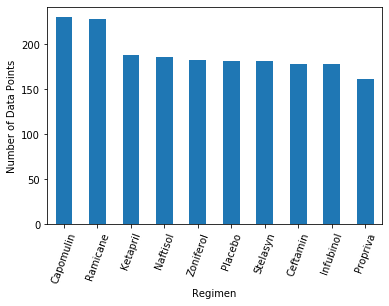

In [4]:
barplot = study_data['Drug Regimen'].value_counts()
barplot.plot(kind = "bar")
plt.xlabel("Regimen")
plt.xticks(rotation = 70)
plt.ylabel("Number of Data Points")
plt.show()

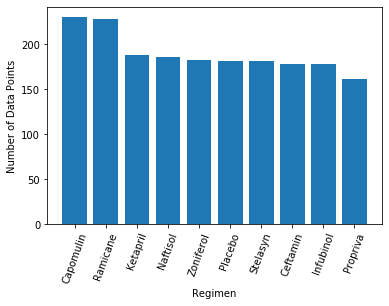

In [8]:
barplot = study_data['Drug Regimen'].value_counts()
plt.bar(barplot.index.values,barplot.values)
plt.xlabel("Regimen")
plt.xticks(rotation = 70)
plt.ylabel("Number of Data Points")
plt.show()

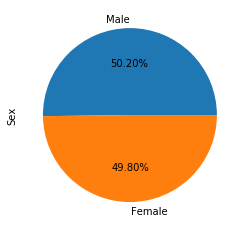

In [9]:
pie = mouse_metadata.Sex.value_counts()
# 1.1 to 1.2 to 1.3 etc adds an extra decimal place
pie.plot(kind = "pie", autopct = '%1.2f%%')
plt.show()

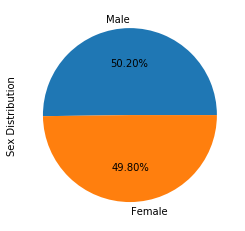

In [10]:
pie = mouse_metadata.Sex.value_counts()
plt.pie(pie.values, labels = pie.index.values, autopct='%1.2f%%')
plt.ylabel("Sex Distribution")
plt.show()

In [12]:
capomulin = study_data.loc[study_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = study_data.loc[study_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = study_data.loc[study_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = study_data.loc[study_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

capomulin_outlier = capomulin.quantile([.25,.5,.75])
first_q_cap = capomulin_outlier[0.25]
last_q_cap = capomulin_outlier[0.75]
iqr_cap = last_q_cap - first_q_cap
lower_bound_cap = first_q_cap - (1.5 * iqr_cap)
upper_bound_cap = last_q_cap + (1.5 * iqr_cap)

ramicane_outlier = ramicane.quantile([.25,.5,.75])
first_q_ram = ramicane_outlier[0.25]
last_q_ram = ramicane_outlier[0.75]
iqr_ram = last_q_ram - first_q_ram
lower_bound_ram = first_q_ram - (1.5 * iqr_ram)
upper_bound_ram = last_q_ram + (1.5 * iqr_ram)

infubinol_outlier = infubinol.quantile([.25,.5,.75])
first_q_inf = infubinol_outlier[0.25]
last_q_inf = infubinol_outlier[0.75]
iqr_inf = last_q_inf - first_q_inf
lower_bound_inf = first_q_inf - (1.5 * iqr_inf)
upper_bound_inf = last_q_inf + (1.5 * iqr_inf)

ceftamin_outlier = ceftamin.quantile([.25,.5,.75])
first_q_cef = ceftamin_outlier[0.25]
last_q_cef = ceftamin_outlier[0.75]
iqr_cef = last_q_cef - first_q_cef
lower_bound_cef = first_q_cef - (1.5 * iqr_cef)
upper_bound_cef = last_q_cef + (1.5 * iqr_cef)




print(f"capomulin potential outliers: {capomulin.loc[(capomulin < lower_bound_cap) | (capomulin > upper_bound_cap)]}")
print(f"ramicane potential outliers: {ramicane.loc[(ramicane < lower_bound_ram) | (ramicane > upper_bound_ram)]}")
print(f"infubinol potential outliers: {infubinol.loc[(infubinol < lower_bound_inf) | (infubinol> upper_bound_inf)]}")
print(f"ceftamin potential outliers: {ceftamin.loc[(ceftamin < lower_bound_cef) | (capomulin > upper_bound_cef)]}")



capomulin potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
ramicane potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [13]:
capomulin = study_data.loc[study_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = study_data.loc[study_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = study_data.loc[study_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = study_data.loc[study_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

capomulin_outlier = capomulin.quantile([.25,.5,.75])
first_q_cap = capomulin_outlier[0.25]
last_q_cap = capomulin_outlier[0.75]
iqr_cap = last_q_cap - first_q_cap
lower_bound_cap = first_q_cap - (1.5 * iqr_cap)
upper_bound_cap = last_q_cap + (1.5 * iqr_cap)

ramicane_outlier = ramicane.quantile([.25,.5,.75])
first_q_ram = ramicane_outlier[0.25]
last_q_ram = ramicane_outlier[0.75]
iqr_ram = last_q_ram - first_q_ram
lower_bound_ram = first_q_ram - (1.5 * iqr_ram)
upper_bound_ram = last_q_ram + (1.5 * iqr_ram)

infubinol_outlier = infubinol.quantile([.25,.5,.75])
first_q_inf = infubinol_outlier[0.25]
last_q_inf = infubinol_outlier[0.75]
iqr_inf = last_q_inf - first_q_inf
lower_bound_inf = first_q_inf - (1.5 * iqr_inf)
upper_bound_inf = last_q_inf + (1.5 * iqr_inf)

ceftamin_outlier = ceftamin.quantile([.25,.5,.75])
first_q_cef = ceftamin_outlier[0.25]
last_q_cef = ceftamin_outlier[0.75]
iqr_cef = last_q_cef - first_q_cef
lower_bound_cef = first_q_cef - (1.5 * iqr_cef)
upper_bound_cef = last_q_cef + (1.5 * iqr_cef)



#forgot to change one of the ceftamin labels when i copied from the capomulin version when i ran it the first time whoops
print(f"capomulin potential outliers: {capomulin.loc[(capomulin < lower_bound_cap) | (capomulin > upper_bound_cap)]}")
print(f"ramicane potential outliers: {ramicane.loc[(ramicane < lower_bound_ram) | (ramicane > upper_bound_ram)]}")
print(f"infubinol potential outliers: {infubinol.loc[(infubinol < lower_bound_inf) | (infubinol> upper_bound_inf)]}")
print(f"ceftamin potential outliers: {ceftamin.loc[(ceftamin < lower_bound_cef) | (ceftamin > upper_bound_cef)]}")

capomulin potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
ramicane potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


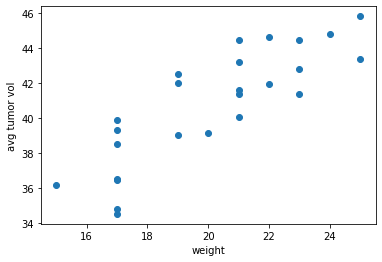

In [14]:
# pull the cap data, group by individual mice, indicate that we're looking for averages, and then tell it what we want the averages for, then we add labels
scatter = study_data.loc[study_data['Drug Regimen'] == "Capomulin"]
avg_vol = scatter.groupby(['Mouse ID']).mean()
plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
plt.xlabel('weight')
plt.ylabel('avg tumor vol')
plt.show()

correlation coefficient = (0.8419363424694717, 1.322572243471279e-07)


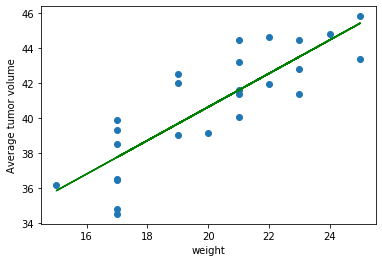

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# pearsonr calculates linear correlation between two 
correlation = st.pearsonr(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
print(f"correlation coefficient = {correlation}")
reg_model = st.linregress(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
weights = avg_vol['Weight (g)'] * reg_model[0] + reg_model[1]
plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
plt.plot(avg_vol['Weight (g)'], weights, color = "green")
plt.xlabel('weight')
plt.ylabel('Average tumor volume')
plt.show()